<a href="https://colab.research.google.com/github/chloe-cyc/Vela_Midas/blob/main/Vela_Twitter_Midas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown --id 1RxZ5v12NINAPM2gBvOinOmVWhkipvkHJ

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RxZ5v12NINAPM2gBvOinOmVWhkipvkHJ
To: /content/Twitter Likes.csv
100% 8.96M/8.96M [00:00<00:00, 17.4MB/s]


In [ ]:
! gdown --id 1T8NkcfzqiN0R33GSQXEh9eaMbFBU1_9D

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1T8NkcfzqiN0R33GSQXEh9eaMbFBU1_9D
To: /content/Twitter comments.csv
100% 3.19M/3.19M [00:00<00:00, 137MB/s]


In [2]:
#Import Packages
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import datetime #bi

pd.options.mode.chained_assignment = None

# **Liked Users Dataset**

In [3]:
likes = pd.read_csv("Twitter Likes.csv")
likes = likes.drop_duplicates()
#midas["round_order"] = midas.round_name.map(round_order)
likes.head()

,investor_name,organization,investor,liked_user,count
0,Ryan McIntyre,Foundry Group,ryan_mcintyre,chrismichel,153
1,Ryan McIntyre,Foundry Group,ryan_mcintyre,yoavlurie,153
2,Ryan McIntyre,Foundry Group,ryan_mcintyre,Rainmaker1973,84
3,Ryan McIntyre,Foundry Group,ryan_mcintyre,KatieS,41
4,Ryan McIntyre,Foundry Group,ryan_mcintyre,km,33


In [ ]:
likes.liked_user.value_counts().shape

(75737,)

In [ ]:
likes.investor.value_counts().shape

(319,)

In [ ]:
likes.organization.value_counts().shape

(27,)

In [ ]:
unique_investors_list = likes.investor.unique()
unique_liked_users_list = likes.liked_user.unique()
print(len(set(unique_liked_users_list)&set(unique_investors_list)))

267


In [ ]:
sum(likes.liked_user.value_counts() >= 50)

170

# __Comments Dataset__

In [ ]:
comments = pd.read_csv("Twitter comments.csv")
comments = comments.drop_duplicates()
comments.shape

(60291, 5)

In [ ]:
#Data Exploring
comments.investor.value_counts().shape

(320,)

In [ ]:
comments.organization.value_counts().shape

(27,)

In [ ]:
comments.commented_user.value_counts().shape

(33797,)

In [4]:
unique_investors_list_comments = comments.investor.unique()
unique_liked_users_list_comments = comments.commented_user.unique()

NameError: ignored

In [ ]:
sum(comments.commented_user.value_counts() >= 50)

24

# __Data Exploring Results__

---
__Twitter Likes__
*   Number of Rows of Unique Data: 168,120
*   Number of Twitter Investors in Dataset: 319
*   Number of Users who have been interacted with: 75,737
*   Number of Users who have been interacted with more than 50 times (total): 170
  * Note that these are the users we want to focus on for similarity calculations
*   Number of Organisations in Dataset: 27
*   Number of Investors who are also liked users: 267 
  * Perhaps graphing these would be good

More than 30 likes of a specific user = big fan of one specific user = why?

More than 50 total likes = active user = more accurate data

---
__Twitter Comments (NOT UP TO DATE)__

*   Number of Rows of Unique Data: 60, 291
*   Number of Twitter Investors in Dataset: 320
*   Number of Users who have been interacted with: 33,797
*   Number of Users who have been interacted with more than 50 times: 25
  * Note that these are the users we want to focus on as "neighbours"
*   Number of Organisations in Dataset: 27
*   Number of Investors who are also users that have been commented on: 2430
*   Number of Investors who have more than 50 interactions (active investors): (NOT UP TO DaTE)

# N-Nearest Neighbours (Comments)
Iteration on algorithms by J. Piskorz

In [135]:
"""
Return for a pair of investors, the list of common liked or commented users

Parameters
---
investor_1: str
  Username of the first investor that the function analyses
investor_2: str
  Username of the second investor that the function analyses


Other things to consider that could be added as a parameter:
  Is the common user also an investor?
  Is the common user someone who has been interacted greater than x number of times?
"""

def liked_together(investor_1, investor_2,data):
  data = data

  #List of names of users that investor 1 and investor 2 has interacted with
  investor1_liked = data.loc[data["investor"] == investor_1].liked_user.unique()
  investor2_liked = data.loc[data["investor"] == investor_2].liked_user.unique()

  #List of users who have been interacted with by the two investors
  matchlikedusers = set(investor1_liked).intersection(investor2_liked)

  return matchlikedusers

def not_liked_together(investor_1, investor_2,data):
  data = data

  investor1_liked = data.loc[data["investor"] == investor_1].liked_user.unique()
  investor2_liked = data.loc[data["investor"] == investor_2].liked_user.unique()

  otherlikedusers = set(investor1_liked).difference(investor2_liked)

  return otherlikedusers

In [144]:
#For a given two investors who have both invested in a given user, the distance between them is given by subtracting the count of each
#n.b This function will throw an error if the user is not liked by both investors - which is fine in our case

def distance(investor_1, investor_2, user,data):
    data = data
    count_1 = data[(data['investor']== investor_1) & (data['liked_user']== user)]["count"].item()
    count_2 = data[(data['investor']== investor_2) & (data['liked_user']== user)]["count"].item()

    dist = abs(count_1-count_2)
    return dist


Functionality to be added for n_nearest_neighbours:
*   (Done) Ability to go off of ivestor name
*   Organisation to investor similarity and vice versa
  *  (DONE) Cumulate similar users who have been liked 
* (DONE) investor_list - only consider similarity between investor and investor in list


In [138]:
#aggregation Sequoia Capital

organization_data = likes.drop(columns=["investor_name","investor"]).groupby(likes["liked_user"], as_index=False).agg({"organization":"first","liked_user":"first", "count":"sum"})
find_val = organization_data.loc[(organization_data.organization == "Foundry Group") & (organization_data.liked_user == "yoavlurie")]
print(find_val)

        organization liked_user  count
75204  Foundry Group  yoavlurie    176


In [153]:
"""
Finds N most similar investors to user specified constraints.

Parameters
---

Investor: Str
  The name of the Investor for which neighbours are which to be computed
N: Int
  The number of nearest neighbours to be computed
Similarity: str or list
  If str:
    Function used to compute the similarity between investors.
        - "jacc": jaccard similarity
        - "cond": conditional probability-based similarity
        - "abs": total number of users co-interacted
        - "count_sim": similarity which is inversly proportional to the distance between the investors specified using 'count_scale' and note that this 
Min_no_likes: int
  Only consider users which have at least minimum number of likes by specific user or total - not sure yet which one to use
sim_func: function
  The function used to convert the distance into a similarity measure on a [0, 1] interval when using like similarity as a similarity measure.
investors_list: list or ()
  If (): consider all the investors in the dataset
        Otherwise: only consider the similarity between the VC and the investors in the list
"""

def n_nearest_neighbours(investor_name, n=10, similarity="jacc", min_no_total_likes=400, sim_func="default", investors_list=(), min_user_likes=7):
  data = likes[likes["count"] >=min_user_likes]
  organization_data = likes.drop(columns=["investor_name","investor"]).groupby(likes["liked_user"], as_index=False).agg({"organization":"first","liked_user":"first", "count":"sum"})

  #n_neighbours_df = n_nearest_neighbours(investor_un, n=n, similarity=similarity, min_no_likes = min_no_likes, sim_func  = sim_func)

  #if scale == 'default':
     # print("hi")

  if sim_func == "default":
    def sim_func(x):
        return(1/(1+x))
  
  #Make allowance for data being given as name and output as name
  investor_un = data.loc[data.investor_name == investor_name, "investor"].head(1).item()

  if investors_list:
    data = [data.loc[data.investor_name == i, "investor"].head(1).item() for i in investors_list]

  #List all investors has interacted with
  
  investor_array = data.groupby(data["investor"],as_index=False).agg({"investor":"first", "count":"sum"})
  investor_array = np.array(investor_array[investor_array["count"]>=min_no_total_likes].investor.unique())
  #Investors who have more than min_no_total_likes interactions total
  investor_array = investor_array[investor_array != investor_un] #List of Investors that do not include investor of interest
  investor_array_names = [data.loc[data.investor == i, "investor_name"].head(1).item() for i in investor_array]

  #investor_name = investor_name

  #Computing similarities
  investor_interactions =[]
  for i in range(len(investor_array)):
    investor_interactions.append(data.loc[data.investor == investor_array[i],"count"].sum())                       
  similarity_df = pd.DataFrame({"Count": investor_interactions}, index=investor_array_names)

  ind = 1
  if type(similarity) == str:  
    similarity = [similarity]

  for sim in similarity:

    if sim == "jacc": #counts have not been factored into this.
      sim_vector = [len(liked_together(investor_un,i,data))/(len(not_liked_together(investor_un,i,data))+len(liked_together(investor_un,i,data))) for i in investor_array]

    elif sim == "cond": #Counts have not been factored into this
      #Conditional probability that investor has liked a given user given that another investor has already liked them
      sim_vector = [len(liked_together(investor_un,i,data))/(len(data.loc[data["investor"] == i].liked_user.unique())) for i in investor_array]

    elif sim == "abs": #counts have not been factored into this
      #Count the number of uesers that investor A and investor B have liked together
      sim_vector = [len(liked_together(investor_un,i,data)) for i in investor_array]

    elif sim == "count_sim":
      "Two investors are more similar if they liked a user a similar nmber of times."
      sim_vector = np.zeros(len(investor_array))
      dist = []
      total_dist = 0
      for i in range(len(investor_array)):
        together = liked_together(investor_un, investor_array[i], data)
        if together == 0:
          sim_vector[i] = 0
        elif together !=0:
          for u in together: # for a given user in the list of users that have been liked by two investors
            dist.append(distance(investor_un, investor_array[i], u,data))
            ave_dist = sum(dist)/len(together)
            sim_vector[i] = sim_func(ave_dist)  

    new_sim_df = pd.DataFrame({sim: sim_vector}, index=investor_array_names)
    similarity_df = similarity_df.join(new_sim_df)
    
    #if ind == 1:
     #   similarity_df = similarity_df.sort_values(by=similarity[0], ascending=False).head(n)
     #   investors_top = list(similarity_df.index)
     #   investor_array = [invested_list[list(investors).index(x)] for x in investors_top]
    #    investors = investors_top.copy()
    #    ind += 1
  similarity_df = similarity_df.sort_values(by=similarity_df.columns[1], ascending=False).head(n)

  return similarity_df


__Example Return__

In [156]:
n_nearest_neighbours("Matt Miller", similarity = ("abs","cond","jacc","count_sim"), min_no_total_likes = 500, min_user_likes = 0)

,Count,abs,cond,jacc,count_sim
Patrick Grady,1964,69,0.104230,0.160839,0.006610
Roelof Botha,1966,56,0.085890,0.130536,0.002782
Vipin Chamakkala,1923,55,0.086888,0.128205,0.002198
Stephanie Zhan,1942,50,0.059312,0.116550,0.002042
Bogomil Balkansky,1710,50,0.108460,0.116550,0.066225
Andrew Reed,1947,49,0.065421,0.114219,0.012475
Josh Coyne,1971,49,0.077287,0.114219,0.003559
Bryan Schreier,613,47,0.164912,0.109557,0.002109
Jess Lee,1965,47,0.057039,0.109557,0.003617
Dannie Herzberg,1964,46,0.091633,0.107226,0.005838


# __Graph View of n_nearest neighbours__

In [58]:
import networkx as nx
import matplotlib as mpl
from sklearn.manifold import MDS

Functionality to be added to plot:
* Ability to specify organisation plot
* Ability to specify organisation to investor similarity

In [162]:
"""
Finds n most similar investors to given investor under the specified constrains and plots them onto a network graphs. 
Distances between nodes are based on the absolute similarity. 
Node sizes indicate total number of interactions by a given user
Edge colours indicate the spceifid similarity matrix between investor and neighbours.

Paramaters:

Investor: Str
  The name of the Investor for which neighbours are which to be computed
N: Int
  The number of nearest neighbours to be computed
Similarity: str or list
  If str:
    Function used to compute the similarity between investors.
        - "jacc": jaccard similarity
        - "cond": conditional probability-based similarity
        - "abs": total number of users co-interacted
        - "count_sim": similarity which is inversly proportional to the distance between the investors specified using 'count_scale' and note that this 
Min_no_likes: int
  Only consider users which have at least minimum number of likes by specific user or total - not sure yet which one to use
sim_func: function
  The function used to convert the distance into a similarity measure on a [0, 1] interval when using like similarity as a similarity measure.
save: bool
  If true, save plot as a png
"""

def plot_n_nearest_neighbours(investor_name, n=10, similarity="jacc", min_no_total_likes=50, sim_func="default", save=False, min_user_likes=5):

  data = likes[likes["count"] >=min_user_likes]

  if similarity == "abs":
      raise Exception("Use a different similarity measure for plotting the graph!")

  n_neighbours_df = n_nearest_neighbours(investor_name, n=n, min_no_total_likes=min_no_total_likes, sim_func=sim_func, similarity=similarity, min_user_likes=min_user_likes)
  n_neighbours_df.head(n)
  n_neighbours = [investor_name] + list(n_neighbours_df.index)
  neighbours_only = list(n_neighbours_df.index) 
  similarity_values = np.array(n_neighbours_df[similarity])
  normalised_similarity_values = [similarity_values[i]/max(similarity_values) for i in range(len(similarity_values))]

  #if sim_func == "default":
   #   def sim_func(x):
    #    return(1/(1+x))
  
  #names to username so that it can be compared back
  investor_un = data.loc[data.investor_name == investor_name, "investor"].head(1).item()
  n_neighbours_un = [data.loc[data.investor_name == i, "investor"].head(1).item() for i in n_neighbours]
  n_neighbours_un.insert(0, investor_un)
  neighbours_only_un = [data.loc[data.investor_name == i, "investor"].head(1).item() for i in neighbours_only]
  neighbours_only_names = list(n_neighbours_df.index)

  liked_user_list = list([data.loc[data["investor"] == i].liked_user.unique() for i in n_neighbours_un])

  #Users who have been liked themselves
  liked_back_list = []
  allinvestors_list = data.investor.unique()

  for i in range(len(neighbours_only_un)):
    if neighbours_only_un[i] in allinvestors_list:
      likedbylikedinvestor = data.loc[data["investor"] == neighbours_only_un[i]].liked_user.unique()
      if investor_un in likedbylikedinvestor:
        liked_back_list.append(True)
      else:
        liked_back_list.append(False)
    else:
      liked_back_list.append(False)

  # Find the position of the nodes based on the number of users who have also been liked by a given investor - this must be true because distance matrix used must be symmetric (and also works better than when bounded for some reason...)
  A_sim = np.array([[len(set(liked_user_list[i]) & set(liked_user_list[j])) for i in range(len(n_neighbours))] for j in range(len(n_neighbours))])

  B = A_sim - np.diag(np.diag(A_sim))
  A_dist = np.ones(A_sim.shape)*B.max()*1.1  - A_sim
  A_dist -= np.diag(np.diag(A_dist))
  
  mds = MDS(n_components=2, metric=False, dissimilarity='precomputed', n_init=20, max_iter=600)
  transformed_neighbours = mds.fit_transform(A_dist)
  transformed_neighbours -= transformed_neighbours[0, :]
  positions = dict([(n_neighbours[i], transformed_neighbours[i, :]) for i in range(n+1)])
  transformed_neighbours_labels = np.array(transformed_neighbours)
  transformed_neighbours_labels[:, 1] += np.sign(transformed_neighbours_labels[:, 1])*0.03
  positions_labels = dict([(n_neighbours[i], transformed_neighbours_labels[i, :]) for i in range(n+1)])
  
  G = nx.DiGraph()
  G.add_nodes_from(n_neighbours)
  
  edges = [(investor_name, n_neighbours[i+1], {"weight": normalised_similarity_values[i]}) for i in range(n)]
  G.add_edges_from(edges)
  
  M = len(liked_user_list[0])
  node_sizes = np.array([M] + list(n_neighbours_df["Count"]))
  node_sizes = 10 + 400*node_sizes/node_sizes.max()
  node_sizeforplot = node_sizes
  edge_colors = list(normalised_similarity_values)
  cmap = plt.cm.PuRd

  positions_new = positions.copy()
  labels_new = positions_labels.copy()
  sizes_new = np.array([node_sizes[0]])
  new_colours = np.array([edge_colors[0]])
  n_neighbours_liked = []
  new_similarity = []

  for i in range(len(liked_back_list)):
    if liked_back_list[i] == True:
      n_neighbours_liked.append(neighbours_only_names[i])
      new_similarity.append(normalised_similarity_values[i])
      edge_colors = np.append(edge_colors, edge_colors[i])
      node_sizes = np.append(node_sizes, node_sizes[i])
  print(n_neighbours_liked)
  #Gnew = nx.DiGraph()
  #Gnew.add_nodes_from(n_neighbours_liked)

  edges_new = [(n_neighbours_liked[i], investor_name, {"weight": new_similarity[i]}) for i in range(len(n_neighbours_liked))]
  G.add_edges_from(edges_new)

  nodes = nx.draw_networkx_nodes(G, positions, node_size=node_sizeforplot, edgecolors=(["blue"] + ["indigo"]*n), linewidths=2, node_color ="none" )
  #nodes.set_edgecolor(["blue"]+["indigo"]*n)

  edges = nx.draw_networkx_edges(
      G,
      positions,
      node_size=node_sizes,
      arrowstyle="->",
      arrowsize=10,
      edge_color=edge_colors,
      edge_cmap=cmap,
      width=2.5,
      alpha=0.7,
      label=similarity
  )

  nx.draw_networkx_labels(G, positions_labels, font_size=13, font_color="black", clip_on=False, alpha=0.9)

  pc = mpl.collections.PatchCollection(edges, cmap=cmap)
  pc.set_array(edge_colors)

  #plt.xlim(-1.2, 1.2)
  #plt.ylim(-1.2, 1.2)
  ax = plt.gca()
  ax.set_axis_off()
  plt.colorbar(pc, ax=ax)
  plt.title(f"The map of {n} nearest neighbours of {investor_name} based on normalised similarity measure {similarity}", fontsize=22)
  ax.figure.set_size_inches(25 , 25)
    
  if save:
      plt.savefig(f'{investor_un}_{similarity}.png', bbox_inches='tight')
    
  plt.show()
        
  A_dist_df = pd.DataFrame(A_dist, index=n_neighbours)
  A_dist_df.columns = n_neighbours
    
  return A_dist_df, n_neighbours_df

__Example Plot__

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


['Patrick Grady', 'Roelof Botha', 'Vipin Chamakkala', 'Stephanie Zhan', 'Bogomil Balkansky', 'Andrew Reed', 'Bryan Schreier', 'Jess Lee', 'Dannie Herzberg']


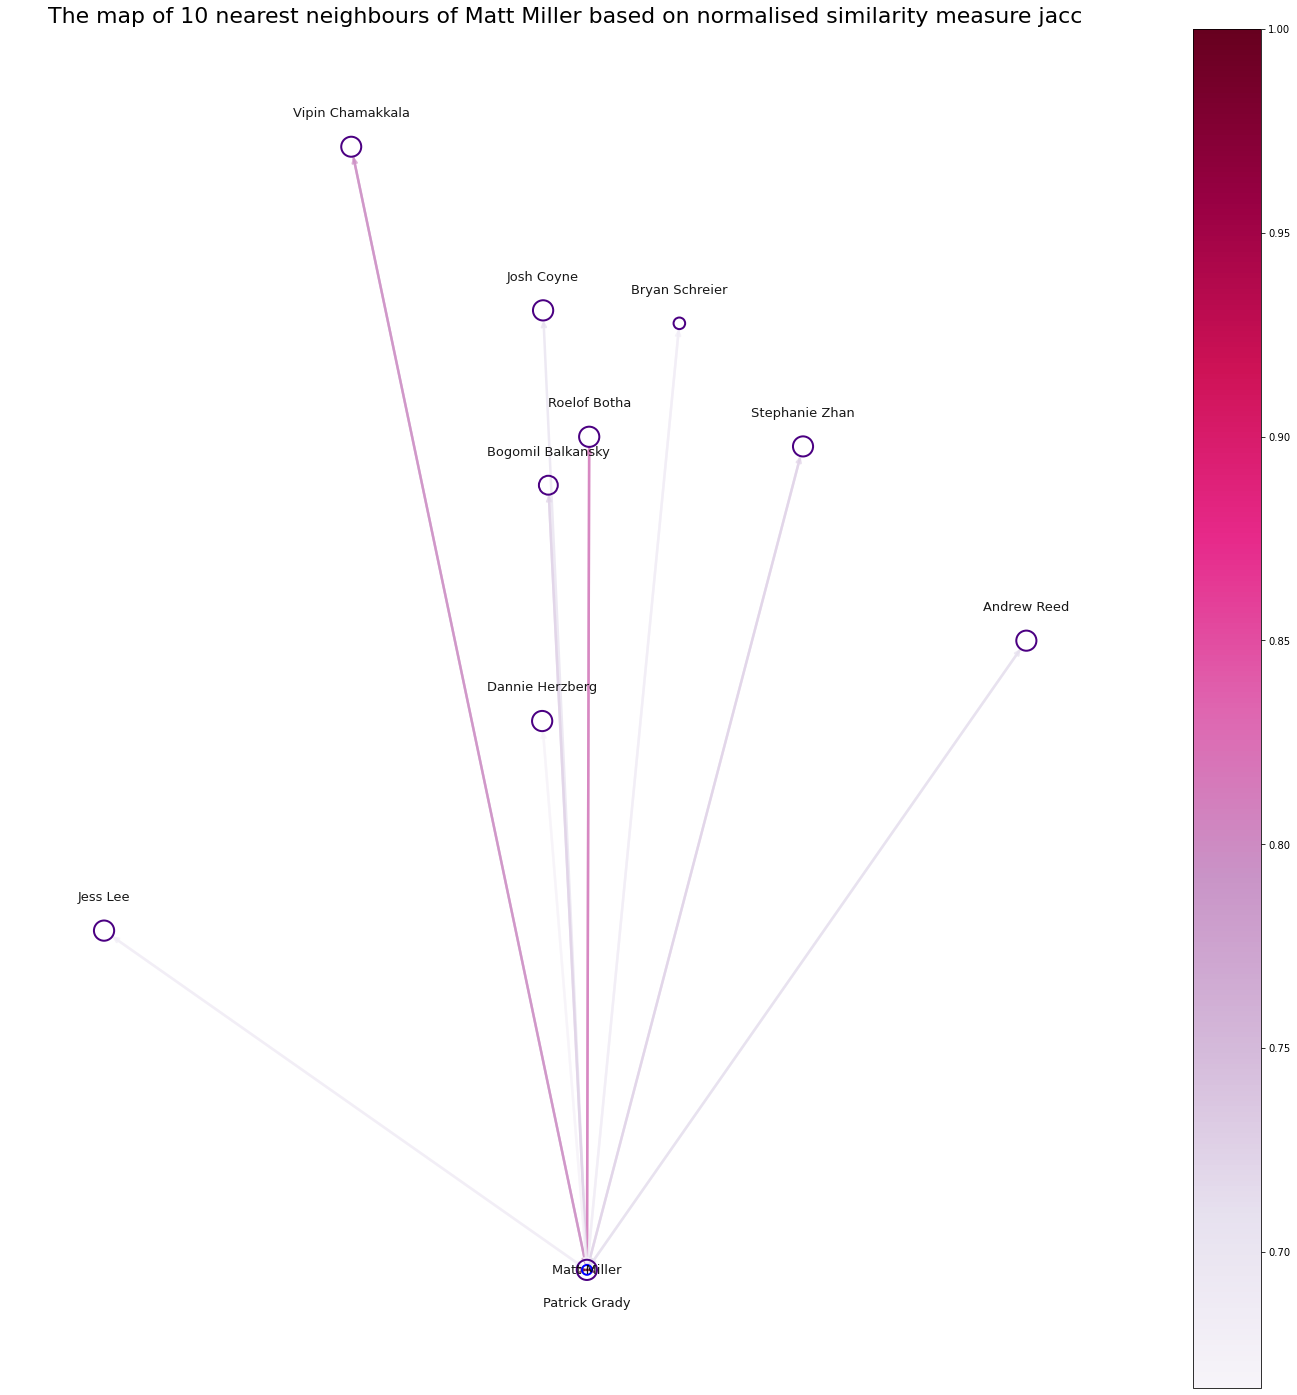

In [163]:
A_dist = plot_n_nearest_neighbours("Matt Miller", similarity = ("jacc"), min_no_total_likes = 500, min_user_likes = 0, n=10)